In [1]:
import sys, os

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf


import numpy as np 
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline



print "Tensor Flow Version: %s" % tf.__version__
print "Keras Version: %s" % keras.__version__
print "Python %s " % sys.version
print "Pandas %s " % pd.__version__
print "Scikit-Learn %s " % sk.__version__


train_directory = os.getcwd() + '/all/train'
test_directory = os.getcwd() + '/all/test'

print train_directory
print test_directory


Using TensorFlow backend.


Tensor Flow Version: 1.8.0
Keras Version: 2.2.0
Python 2.7.15 (default, Sep 18 2018, 20:16:18) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)] 
Pandas 0.23.4 
Scikit-Learn 0.20.0 
/Users/wajih_siddiqui/DeepLearning/all/train
/Users/wajih_siddiqui/DeepLearning/all/test


# Clean Training Data

Found 2750 images belonging to 10 classes.



 10%|█         | 1/10 [00:00<00:01,  6.68it/s]

Motorola-Nexus-6



100%|██████████| 10/10 [00:02<00:00,  3.25it/s]


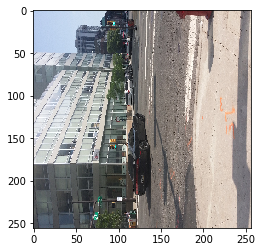

In [3]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
        train_directory,  
        batch_size=1,
        class_mode='categorical')


x, y = train_generator.next()
plt.imshow((x[0]*255).astype('uint8'));
print(list(train_generator.class_indices.keys())[np.argmax(y)])



X_data, Y_data = [], []
for _ in tqdm(range(10)):
    x, y = train_generator.next()
    X_data.append(x[0])
    Y_data.append(y[0])
X_data = np.asarray(X_data)
Y_data = np.asarray(Y_data)

# Creating Model

In [4]:
import numpy as np 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


def get_model():
    input_img = Input((256, 256, 3))
    X = BatchNormalization()(input_img)
    X = Convolution2D(16, (3, 3), activation='relu')(X)
    X = BatchNormalization()(X)
    X = Convolution2D(16, (3, 3), activation='relu')(X)
    X = MaxPooling2D()(X)
    X = Convolution2D(32, (3, 3), activation='relu')(X)
    X = BatchNormalization()(X)
    X = Convolution2D(32, (3, 3), activation='relu')(X)
    X = GlobalMaxPooling2D()(X)
#     X = Flatten()(X)
    X = BatchNormalization()(X)
    X = Dense(512, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(10, activation='softmax')(X)
    model = Model(inputs=input_img, outputs=X)

    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['acc'])
    model.summary()
    return model


model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization_2 (Batch (None, 254, 254, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 32)      4640      
__________

# Fit Model On Data

In [5]:
model_history = model.fit(X_data, Y_data, batch_size=10, epochs=6, validation_split=0.2,
                          callbacks=[EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

Train on 8 samples, validate on 2 samples
Epoch 1/6
8/8 [==============================] - 2s 249ms/step - loss: 2.6140 - acc: 0.0000e+00 - val_loss: 2.5450 - val_acc: 0.0000e+00
Epoch 2/6
8/8 [==============================] - 1s 131ms/step - loss: 2.1066 - acc: 0.2500 - val_loss: 2.3840 - val_acc: 0.0000e+00
Epoch 3/6
8/8 [==============================] - 1s 130ms/step - loss: 1.7729 - acc: 0.6250 - val_loss: 2.2374 - val_acc: 0.0000e+00
Epoch 4/6
8/8 [==============================] - 1s 129ms/step - loss: 1.5141 - acc: 1.0000 - val_loss: 2.1386 - val_acc: 0.0000e+00
Epoch 00004: early stopping


# Testing on Test Data

In [6]:
# load test images
X_test = []

sample_file_path = os.getcwd() + '/all/' + 'sample_submission.csv'

sub = pd.read_csv(sample_file_path)

for fname in tqdm(sub['fname']):
    filepath = test_directory + '/' + fname
    X_test.append(img_to_array(load_img(filepath, target_size=(256, 256))))

X_test = np.asarray(X_test)


 40%|████      | 1061/2640 [00:16<00:23, 66.41it/s]


 80%|███████▉  | 2101/2640 [00:32<00:08, 65.21it/s]


100%|██████████| 2640/2640 [00:41<00:00, 63.95it/s]

# Making Predictions

In [7]:
preds = model.predict(X_test, verbose=1)
preds = np.argmax(preds, axis=1)
preds = [list(train_generator.class_indices.keys())[p] for p in tqdm(preds)]

print preds

2640/2640 [==============================] - 94s 36ms/step



100%|██████████| 2640/2640 [00:00<00:00, 550127.31it/s]

['LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'HTC-1-M7', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'HTC-1-M7', 'LG-Nexus-5x', 'LG-Nexus-5x', 'HTC-1-M7', 'HTC-1-M7', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'HTC-1-M7', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus-5x', 'LG-Nexus